# Optimization

Many algorithms for statistical learning optimize an objective function.  For example, least squares minimizes its objective function while the logit classifier maximizes its objective function.  In these two examples, the objective functions have "nice" properties that make optimization easy.  There are other problems where optimization is not easy, and you will see some of these when studying networks.  

Let's examine a couple of optimization problems so that you have an idea of what's going on.

Canonical set up:

$f: \Re^{N} \rightarrow \Re$

Goal is to find those points $x \in \Re^{N}$ at which $f(x)$ takes on a critical value.  Can write this as:

$\max_{x} f(x)$

The necessary First Order Conditions are:

${\displaystyle \frac{\partial f(x)}{\partial x_i} = 0}\forall i$ 

The sufficient Secord Order Conditions are:

${\displaystyle \frac{\partial^2 f(x)}{\partial x_i\partial x_j}}$
is $\left\{ \begin{array}{l l} 
{} & \quad \text{Negative definite if a maximum} \\ 
{} & \quad \text{Postive definite if a miminum} \\
{} & \quad \text{Indeterminate if neither} \\
\end{array} \right.$

# Two examples with the help of Python

## Example 1

$f(x_1,x_2)=-2x_1^2-x_2^2 + x_1 + x_2$

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


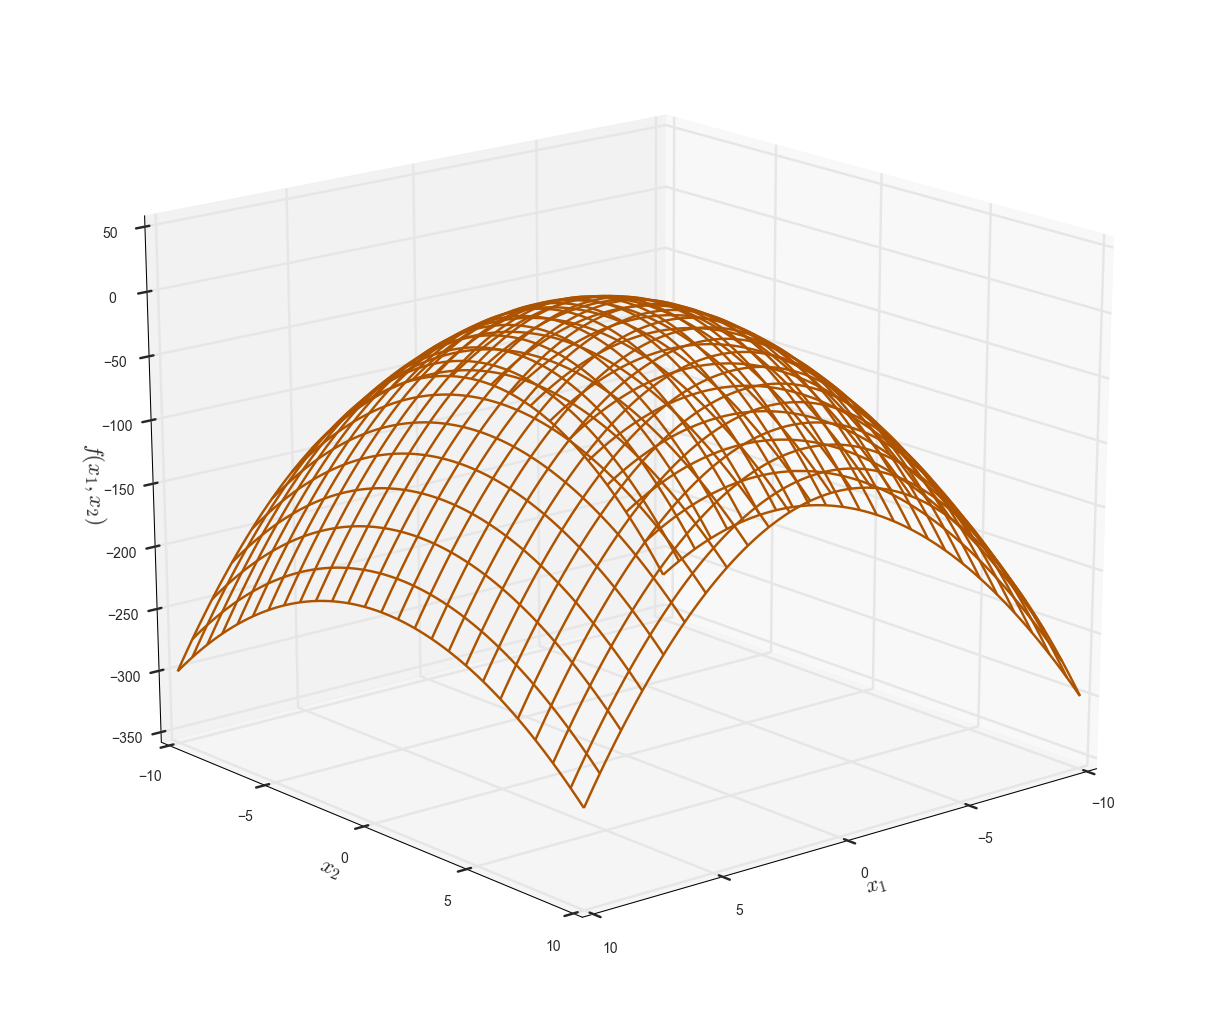

In [2]:
x1 = linspace(-10,10,100)
x2 = linspace(-10,10,100)
x1, x2 = meshgrid(x1, x2)
f = -2 * x1**2 - x2**2 + x1 + x2
        
fig = plt.figure(figsize = (12, 10))
ax = Axes3D(fig)
ax.plot_wireframe(x1, x2, f, rstride=4, cstride=4, color='#AD5300')
ax.view_init(20,50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

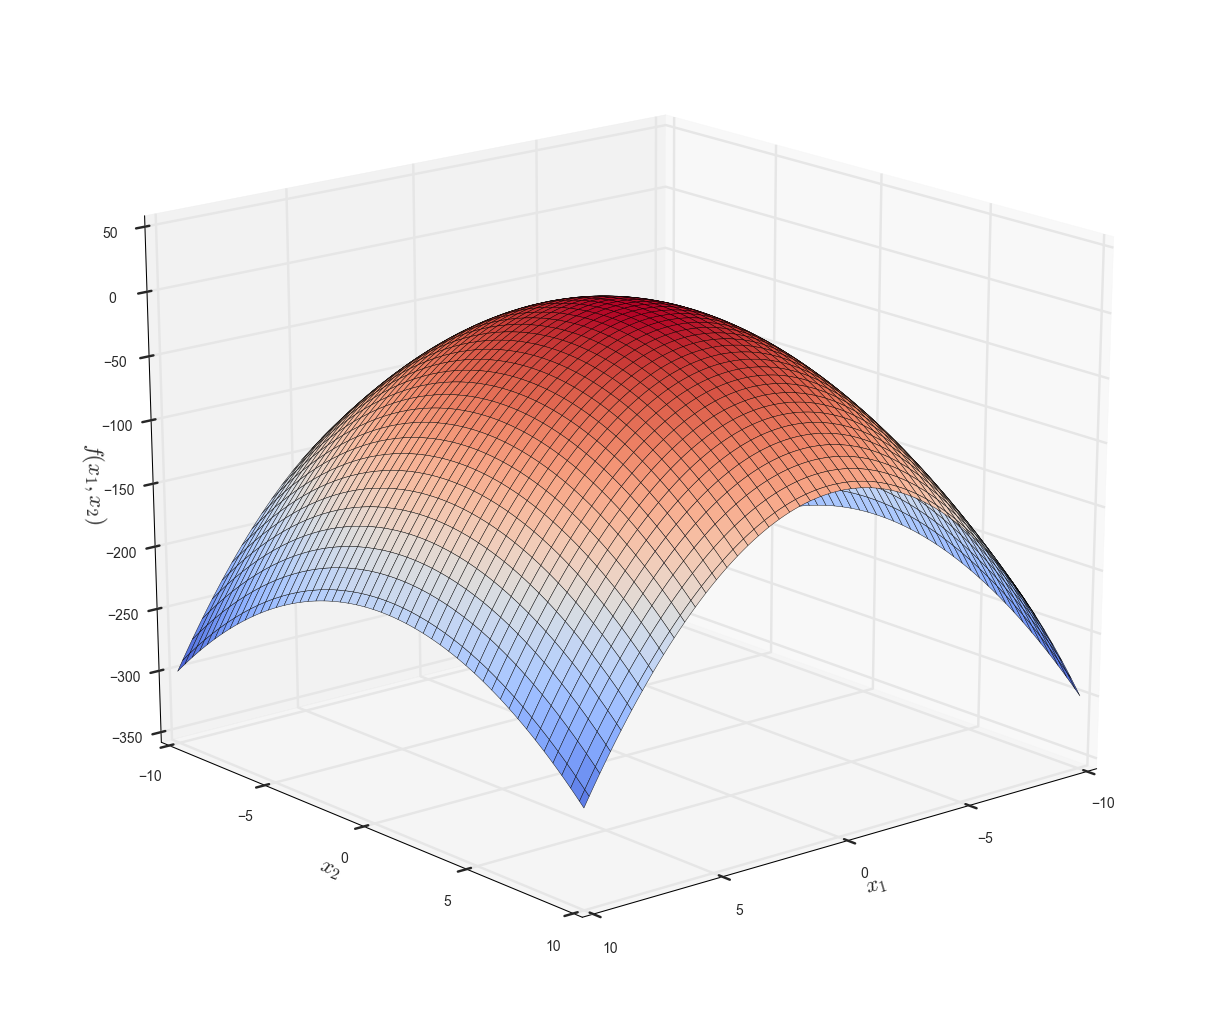

In [3]:
fig = plt.figure(figsize = (12, 10))
ax = Axes3D(fig)
ax.plot_surface(x1, x2, f, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
ax.view_init(20,50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

In [4]:
def func(params, sign=1.0):
    x1, x2 = params
    return sign*(-2 * x1**2 - x2**2 + x1 + x2)

minimize(func, [-10.0, -10.0], args=(-1.0,), method='BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: -0.375000
         Iterations: 8
         Function evaluations: 40
         Gradient evaluations: 10


      fun: -0.37499999999999917
 hess_inv: array([[ 0.25132329,  0.00137504],
       [ 0.00137504,  0.50142814]])
      jac: array([  9.31322575e-08,   4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([ 0.25000002,  0.50000002])

## Example 2

$f(x_1,x_2)=\sqrt{x_1^2+x_2^2}$

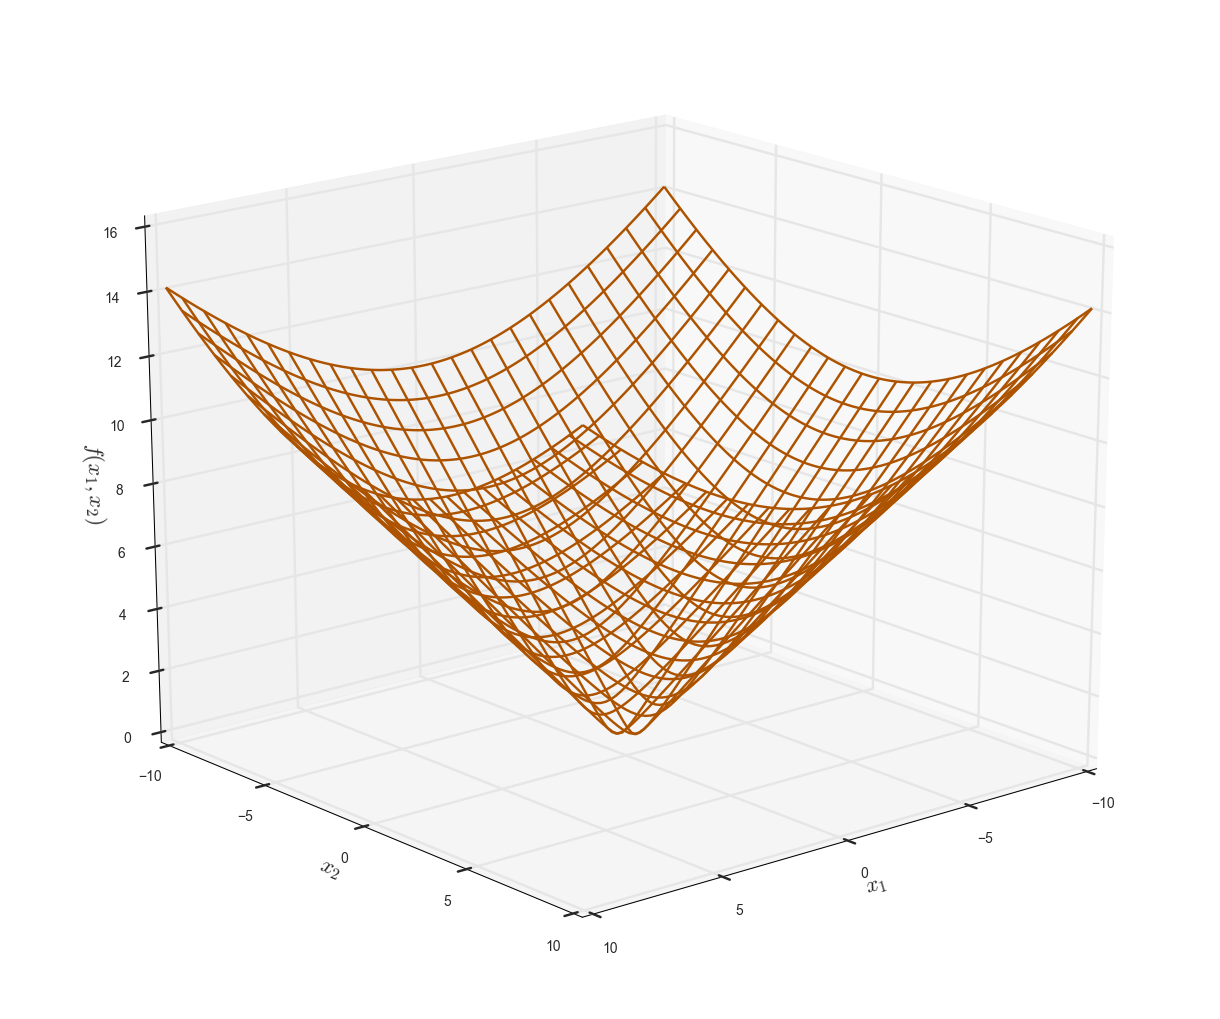

In [5]:
x1 = linspace(-10,10,100)
x2 = linspace(-10,10,100)
x1, x2 = meshgrid(x1, x2)
f = sqrt(x1**2 + x2**2)
        
fig = plt.figure(figsize = (12, 10))
ax = Axes3D(fig)
ax.plot_wireframe(x1, x2, f, rstride=4, cstride=4, color='#AD5300')
ax.view_init(20,50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

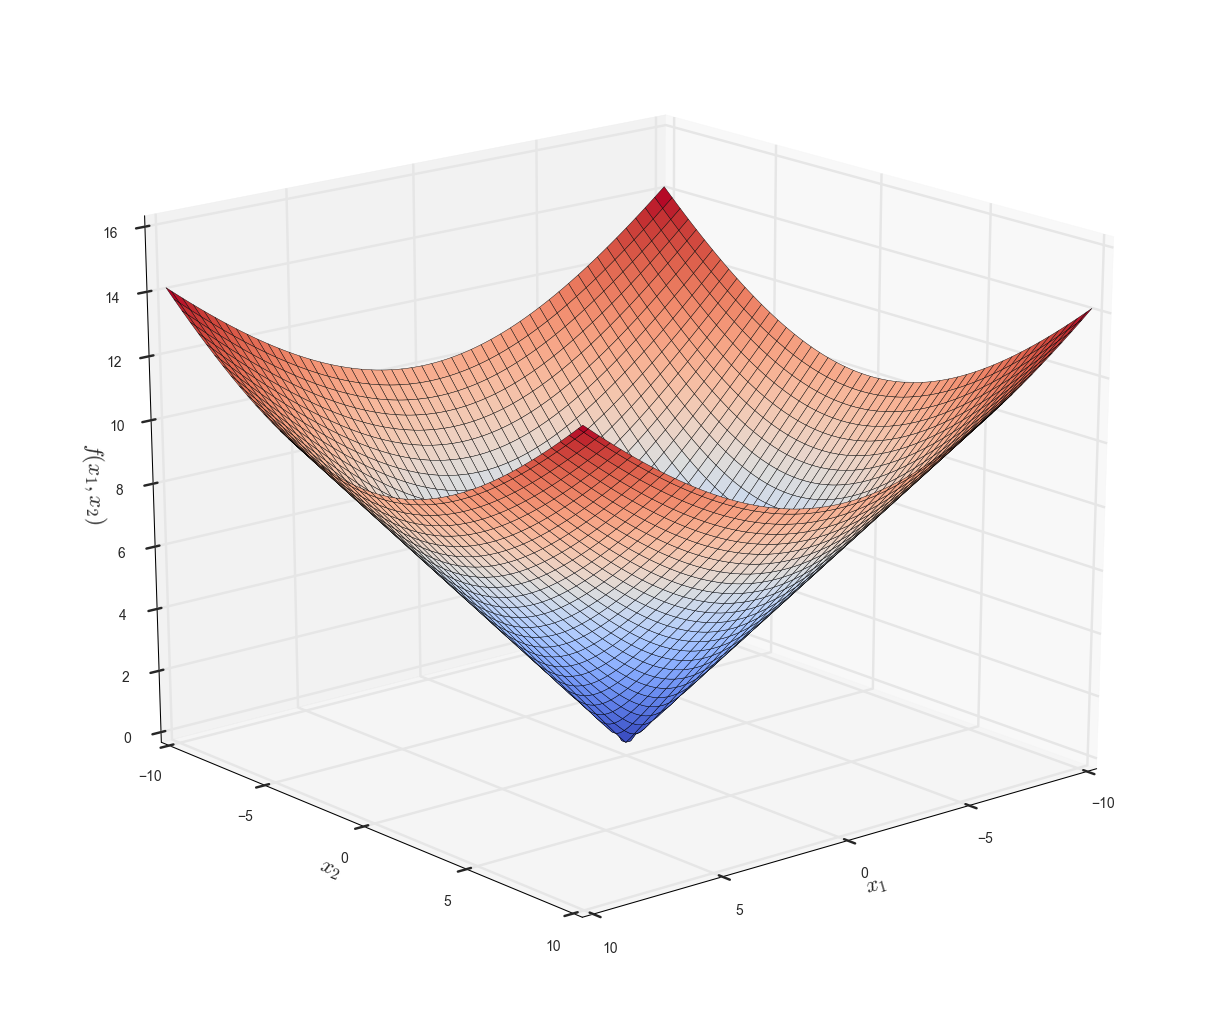

In [6]:
fig = plt.figure(figsize = (12, 10))
ax = Axes3D(fig)
ax.plot_surface(x1, x2, f, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
ax.view_init(20,50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

In [7]:
def func(params, sign=1.0):
    x1, x2 = params
    return sign*(sqrt(x1**2 + x2**2))

minimize(func, [-10.0, 10.0], args=(1.0,), method='BFGS', options={'disp': True})

         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 580
         Gradient evaluations: 142


      fun: 4.7771336629045634e-09
 hess_inv: array([[  1.02649054e-08,   4.51063218e-10],
       [  4.51063218e-10,   1.70570891e-08]])
      jac: array([ 0.36665749,  0.78370151])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 580
      nit: 11
     njev: 142
   status: 2
  success: False
        x: array([ -4.69736970e-09,   8.69323835e-10])

# Optimization Homework

Let $f(x_1,x_2)=x_1^2-x_2^2$

Graph $f(x)$ over a relevant domain using R or Python.  Find all critical points and determine their nature both by hand and by using R or Python.  Submit code and results.